# Assignment: Lending Club Case Study

### Problem Statement

We are given the assignment of the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.
As lending loans to ‘risky’ applicants is the largest source of financial loss, we need to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 

Identification of such applicants using EDA is the aim of this case study.



### 1. Data Understanding

In [1]:
#Importing relevant Python Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
#Notebook display limit setting
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
#read the dataset and check the first five rows
df_loan = pd.read_csv(r'C:\Users\Anmaitre\Downloads\python\loan_cs\loan.csv',low_memory=False)
df_loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
#Check the shape of the dataframe
df_loan.shape


(39717, 111)

In [6]:
#Dataset summary
print('Dataset summary\n')
print('Number of Columns:',df_loan.shape[1])
print('Number of Rows:',df_loan.shape[0])
print('Total Number of Missing values:',df_loan.isnull().sum().sum())
print('Total Number of Unique values:',df_loan.nunique().sum())
print('Number of Duplicates:',df_loan.duplicated().sum())
print('\nDataframe info:\n')
df_loan.info()

Dataset summary

Number of Columns: 111
Number of Rows: 39717
Total Number of Missing values: 2263366
Total Number of Unique values: 416800
Number of Duplicates: 0

Dataframe info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [51]:
#Using describe function to see the summary of columns present in the dataframe
print(df_loan.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

__Identifying Data Quality Issues__ 


In [7]:
print('Percentage of null values per column\n')
print((df_loan.isnull().sum()/df_loan.shape[0]*100).round(2).sort_values(ascending=False))

Percentage of null values per column

num_il_tl                         100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_actv_bc_tl                    100.00
num_accts_ever_120_pd             100.00
mths_since_recent_revol_delinq    100.00
num_actv_rev_tl                   100.00
mths_since_recent_inq             100.00
num_tl_90g_dpd_24m                100.00
num_tl_30dpd                      100.00
num_tl_120dpd_2m                  100.00
num_sats                          100.00
num_rev_tl_bal_gt_0               100.00
num_rev_accts                     100.00
pct_tl_nvr_dlq                    100.00
mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_rev_tl_op             100.00
mo_sin_rcnt_tl                    100.00
mths_since_recent_bc              100.00
mort_acc                          100.00
mths_since_recent_bc_dlq          100.00
bc_util                           100.00
total_rev_hi_lim   

In [8]:
print('Number of Unique values in each column\n')
df_loan.nunique()

Number of Unique values in each column



id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


### 2. Data Cleaning & Manipulation

__Dropping columns with more than 70 percent nulls__

In [9]:
df_loan = df_loan.loc[:,df_loan.isnull().sum()/df_loan.shape[0]*100<70]

__Finding rows with null values in columns__

In [10]:
print('Null columns by rows:\n',(df_loan.isnull().sum(axis=1)))

Null columns by rows:
 0        2
1        1
2        3
3        0
4        0
        ..
39712    4
39713    4
39714    6
39715    6
39716    4
Length: 39717, dtype: int64


In [11]:
print('Row with maximum no. of columns with null values:\n',(df_loan.isnull().sum(axis=1)).max())

Row with maximum no. of columns with null values:
 6


No need to drop any row as we don't have any row with significant number of null values

__Dropping columns with only one unique value__

In [12]:
# Removing irrelevant columns which contain 1 unique value
df_loan = df_loan.loc[:,df_loan.nunique()>1]
# Shape of the dataframe after removing columns
df_loan.shape

(39717, 46)

__Dropping columns not required for analysis__
There are certain columns which we do not need for analyis as those are calculated after deciding for loan
or they are descriptive columns which hardly add any value to analysis.

In [13]:
df_loan=df_loan.drop(['title','emp_title','desc','url'],axis=1)
df_loan= df_loan.drop(['zip_code'],axis=1)
df_loan=df_loan.drop(['member_id'],axis=1)

In [14]:
df_loan=df_loan.drop(['mths_since_last_delinq'],axis=1)

In [15]:
#Checking remaining columns
print(df_loan.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [16]:
#Now removing some more irrelevant columns
df_loan=df_loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','funded_amnt_inv'],axis=1)


In [17]:
#Checking final list of columns
print(df_loan.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


__Treating the missing values__

In [18]:
#Finding percentage of null values per column.
print((df_loan.isnull().sum()/df_loan.shape[0]*100).round(2).sort_values(ascending=False))

emp_length              2.71
pub_rec_bankruptcies    1.75
loan_amnt               0.00
id                      0.00
int_rate                0.00
funded_amnt             0.00
installment             0.00
grade                   0.00
sub_grade               0.00
term                    0.00
home_ownership          0.00
annual_inc              0.00
issue_d                 0.00
verification_status     0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
dtype: float64


__Treating missing values in employment length as it is important column for our analysis__

From our above analysis we can see that 2.71% of values in Employment Legth have Null values. We need to drop these records as Employment Length is an important factor for taking decision on Loan Approval 

In [19]:
#Dropping the null rows where employment lenght for applicants is missing
df_loan = df_loan.dropna(subset=['emp_length'])

__Fixing Missing Values in Public Record of Bankruptcies Coulumns__


In [24]:
# Finding the frequency of values in pub_rec_bankruptcies
print(df_loan.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37072
1.0     1563
2.0        7
Name: count, dtype: int64


In [23]:
# As it is evident from above that "0" is the most frequent value for the column pub_rec_bankruptcies, we will fill the missing values in pub_rec_bankruptcies with "0"
df_loan.pub_rec_bankruptcies.fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38642, dtype: float64

__Fixing the Data Types and Cleaning the Special Characters__

In [25]:
# Checking the datatypes of the columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

Above we can see that most of the columns are still classied as Object, we need to assign these columns a relevant datatypes. But first we need to clean some special symbols or clean the texts present with numerical values in Columns.

Cleaing % sign in interest rate:


In [26]:
df_loan['int_rate'] = df_loan['int_rate'].str.replace('%', '').astype(float)
df_loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38642, dtype: float64

Replacing "months" with blanks in Loan Term:


In [27]:

df_loan['term'] = df_loan['term'].str.replace(' months', '').astype(float)
df_loan['term']

0        36.0
1        60.0
2        36.0
3        36.0
4        60.0
         ... 
39712    36.0
39713    36.0
39714    36.0
39715    36.0
39716    36.0
Name: term, Length: 38642, dtype: float64

Converting Loan Amount, Funded Amounts, Installments, Annual Inc and DTI to numeric:

In [28]:
numeric_columns = ['loan_amnt','funded_amnt','installment','annual_inc','dti']

df_loan[numeric_columns] = df_loan[numeric_columns].apply(pd.to_numeric)

Converting Loan Grade, Sub Grade, Home Ownership, Verification Status, Loan Status, Purpose and State to Category Datatype:

In [29]:
df_loan.grade=df_loan.grade.astype('category')
df_loan.sub_grade=df_loan.sub_grade.astype('category')
df_loan.home_ownership=df_loan.home_ownership.astype('category')
df_loan.verification_status=df_loan.verification_status.astype('category')

In [30]:
df_loan.loan_status=df_loan.loan_status.astype('category')
df_loan.purpose=df_loan.purpose.astype('category')
df_loan.addr_state = df_loan.addr_state.astype('category')

__Deriving New Columns from Loan Issue Date__

In [31]:
#Deriving Loan Issue year
df_loan['issue_year']=pd.to_datetime(df_loan.issue_d,format='%b-%y').dt.year

In [32]:
#Deriving Loan Issue Month
df_loan['issue_month']=pd.to_datetime(df_loan.issue_d,format='%b-%y').dt.month

__Inspecting the Changed Data Frame__

In [33]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    38642 non-null  int64   
 1   loan_amnt             38642 non-null  int64   
 2   funded_amnt           38642 non-null  int64   
 3   term                  38642 non-null  float64 
 4   int_rate              38642 non-null  float64 
 5   installment           38642 non-null  float64 
 6   grade                 38642 non-null  category
 7   sub_grade             38642 non-null  category
 8   emp_length            38642 non-null  object  
 9   home_ownership        38642 non-null  category
 10  annual_inc            38642 non-null  float64 
 11  verification_status   38642 non-null  category
 12  issue_d               38642 non-null  object  
 13  loan_status           38642 non-null  category
 14  purpose               38642 non-null  category
 15  addr_st

In [34]:
# Changing Employment Length to Categorical
df_loan['emp_length'] = pd.Categorical(df_loan['emp_length'])

In [35]:
#Inspecting Employment Length Column
df_loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38642, dtype: category
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years', '9 years', '< 1 year']

__Identifying and removing Outliers in Interest Rate, Loan Amount and Annual Income Column__

In order to identify the ourliers in these numerical columns we are going to visulize the data in form of Box Plot and then identify the Outliers in the given columns

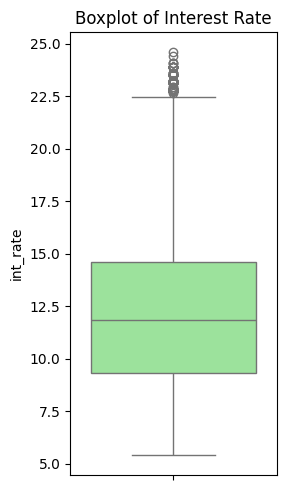

In [37]:
plt.figure(figsize=(8, 5))

# Boxplot for Interest Rate
plt.subplot(1, 3, 2)
sns.boxplot(y=df_loan['int_rate'], color='lightgreen')
plt.title('Boxplot of Interest Rate')



plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of Loan Amount, Annual Income in log scale')

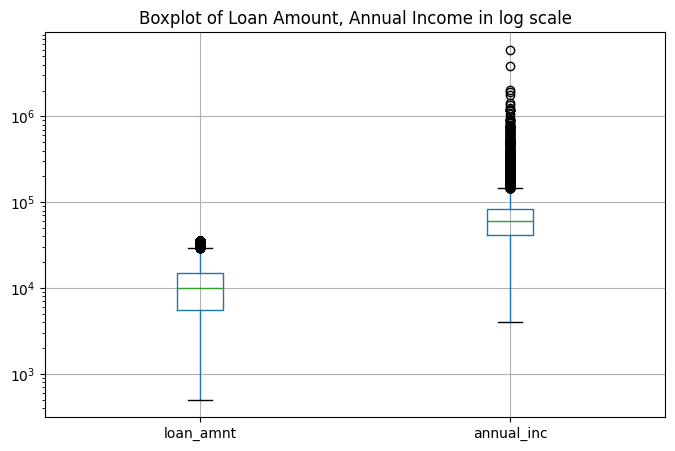

In [38]:
plt.figure(figsize=(8, 5))


# Boxplot for Loan Amount, Annual Income
#plt.subplot(1, 2, 1)
plt.yscale('log')
df_loan.boxplot(column=['loan_amnt','annual_inc']);

plt.title('Boxplot of Loan Amount, Annual Income in log scale')



The above boxplots clearly shows that we do have outliers in Loan Amount Annual Income and Interest Rate numerical columns which will skew our analysis and hence we need to remove these outliers.

Here are the steps that we will implement for treating the Outliers:

1. We will calculate the Interquartile Range (IQR) for all given columns.
2. We will define the lower and upper bounds using the IQR.
3. We will filter out rows where values exceed these bounds.

In [39]:
# For Loan Amount
Q1_loan_amnt = df_loan['loan_amnt'].quantile(0.25)
Q3_loan_amnt = df_loan['loan_amnt'].quantile(0.75)
IQR_loan_amnt = Q3_loan_amnt - Q1_loan_amnt

# Defining bounds for Loan Amount
lower_bound_loan_amnt = Q1_loan_amnt - 1.5 * IQR_loan_amnt
upper_bound_loan_amnt = Q3_loan_amnt + 1.5 * IQR_loan_amnt

# For Interest Rate
Q1_int_rate = df_loan['int_rate'].quantile(0.25)
Q3_int_rate = df_loan['int_rate'].quantile(0.75)
IQR_int_rate = Q3_int_rate - Q1_int_rate

# Defining bounds for Interest Rate
lower_bound_int_rate = Q1_int_rate - 1.5 * IQR_int_rate
upper_bound_int_rate = Q3_int_rate + 1.5 * IQR_int_rate

# For Interest Rate
Q1_annual_inc = df_loan['annual_inc'].quantile(0.25)
Q3_annual_inc = df_loan['annual_inc'].quantile(0.75)
IQR_annual_inc = Q3_annual_inc - Q1_annual_inc

# Defining bounds for Interest Rate
lower_bound_annual_inc = Q1_annual_inc - 1.5 * IQR_annual_inc
upper_bound_annual_inc = Q3_annual_inc + 1.5 * IQR_annual_inc


In [40]:
# Filtering the dataset to remove outliers
df_loan_withoutOutlier = df_loan[(df_loan['loan_amnt'] >= lower_bound_loan_amnt) & 
                                          (df_loan['loan_amnt'] <= upper_bound_loan_amnt) & 
                                          (df_loan['int_rate'] >= lower_bound_int_rate) & 
                                          (df_loan['int_rate'] <= upper_bound_int_rate)]

In [41]:
original_count = len(df_loan)
filtered_count = len(df_loan_withoutOutlier)

print(original_count)
print(filtered_count)

38642
37380


In [42]:
# Filtering the dataset to remove outliers
df_loan_withoutOutlier = df_loan[(df_loan['annual_inc'] >= lower_bound_annual_inc) & 
                                          (df_loan['annual_inc'] <= upper_bound_annual_inc)]

In [43]:
original_count = len(df_loan)
filtered_count = len(df_loan_withoutOutlier)

print(original_count)
print(filtered_count)

38642
36818


### 3. Data Analysis

#### (|) Univariate Analysis

In this analysis we will see the distribution of all relevant variables and identify the patterns:

C:\Users\Anmaitre\AppData\Local\Temp\ipykernel_1080\2907722776.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_loan_withoutOutlier['grade'], order=df_loan_withoutOutlier['grade'].value_counts().index, palette='viridis')
C:\Users\Anmaitre\AppData\Local\Temp\ipykernel_1080\2907722776.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_loan_withoutOutlier['loan_status'], order=df_loan_withoutOutlier['loan_status'].value_counts().index, palette='plasma')


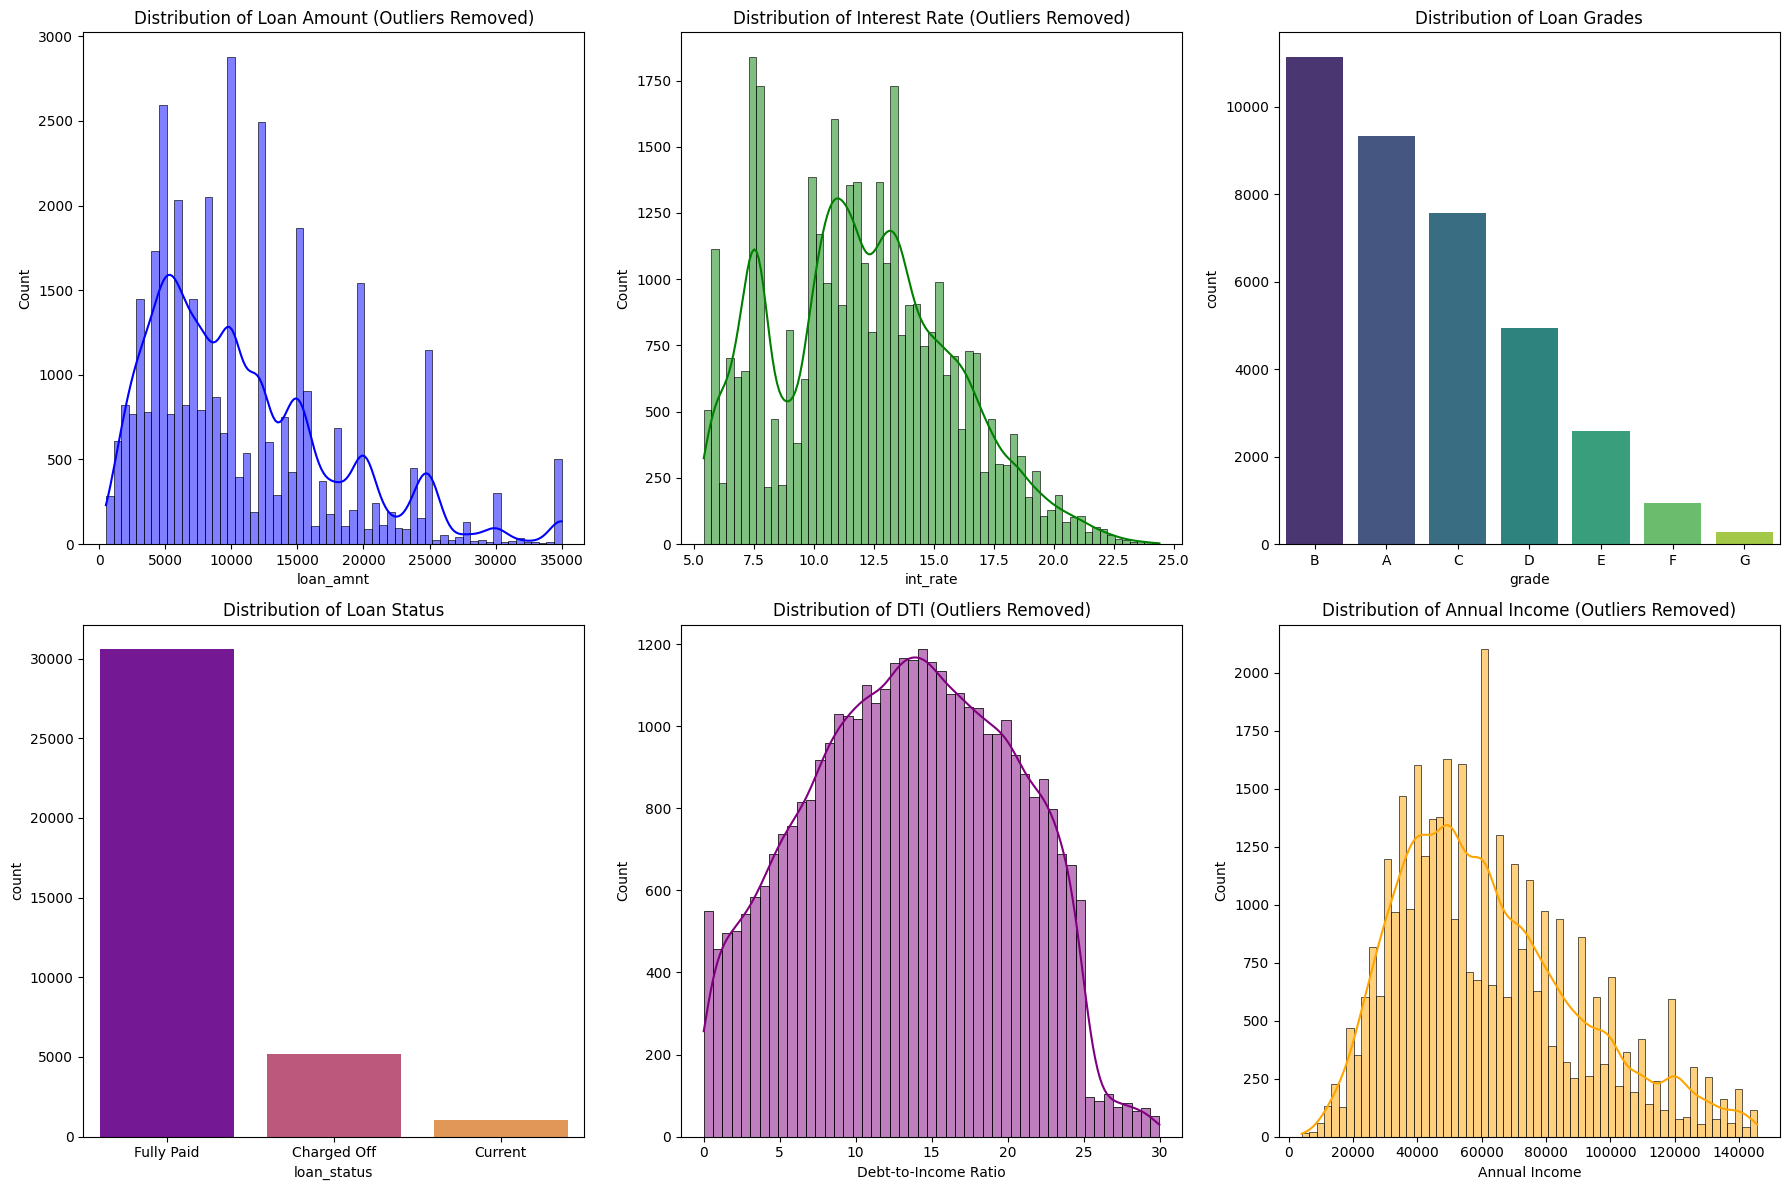

In [44]:
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of Loan Amount
plt.subplot(2, 3, 1)
sns.histplot(df_loan_withoutOutlier['loan_amnt'], kde=True, color='blue')
plt.title('Distribution of Loan Amount (Outliers Removed)')

# Plot 2: Distribution of Interest Rates
plt.subplot(2, 3, 2)
sns.histplot(df_loan_withoutOutlier['int_rate'], kde=True, color='green')
plt.title('Distribution of Interest Rate (Outliers Removed)')

# Plot 3: Loan Grade Distribution
plt.subplot(2, 3, 3)
sns.countplot(x=df_loan_withoutOutlier['grade'], order=df_loan_withoutOutlier['grade'].value_counts().index, palette='viridis')
plt.title('Distribution of Loan Grades')

# Plot 4: Loan Status Distribution
plt.subplot(2, 3, 4)
sns.countplot(x=df_loan_withoutOutlier['loan_status'], order=df_loan_withoutOutlier['loan_status'].value_counts().index, palette='plasma')
plt.title('Distribution of Loan Status')

# Plot 5: Distribution of DTI
plt.subplot(2, 3, 5)
sns.histplot(df_loan_withoutOutlier['dti'], kde=True, color='purple')
plt.title('Distribution of DTI (Outliers Removed)')
plt.xlabel('Debt-to-Income Ratio')

# Plot 6: Distribution of Annual Income
plt.subplot(2, 3, 6)
sns.histplot(df_loan_withoutOutlier['annual_inc'], kde=True, color='orange')
plt.title('Distribution of Annual Income (Outliers Removed)')
plt.xlabel('Annual Income')

plt.tight_layout()
plt.show()



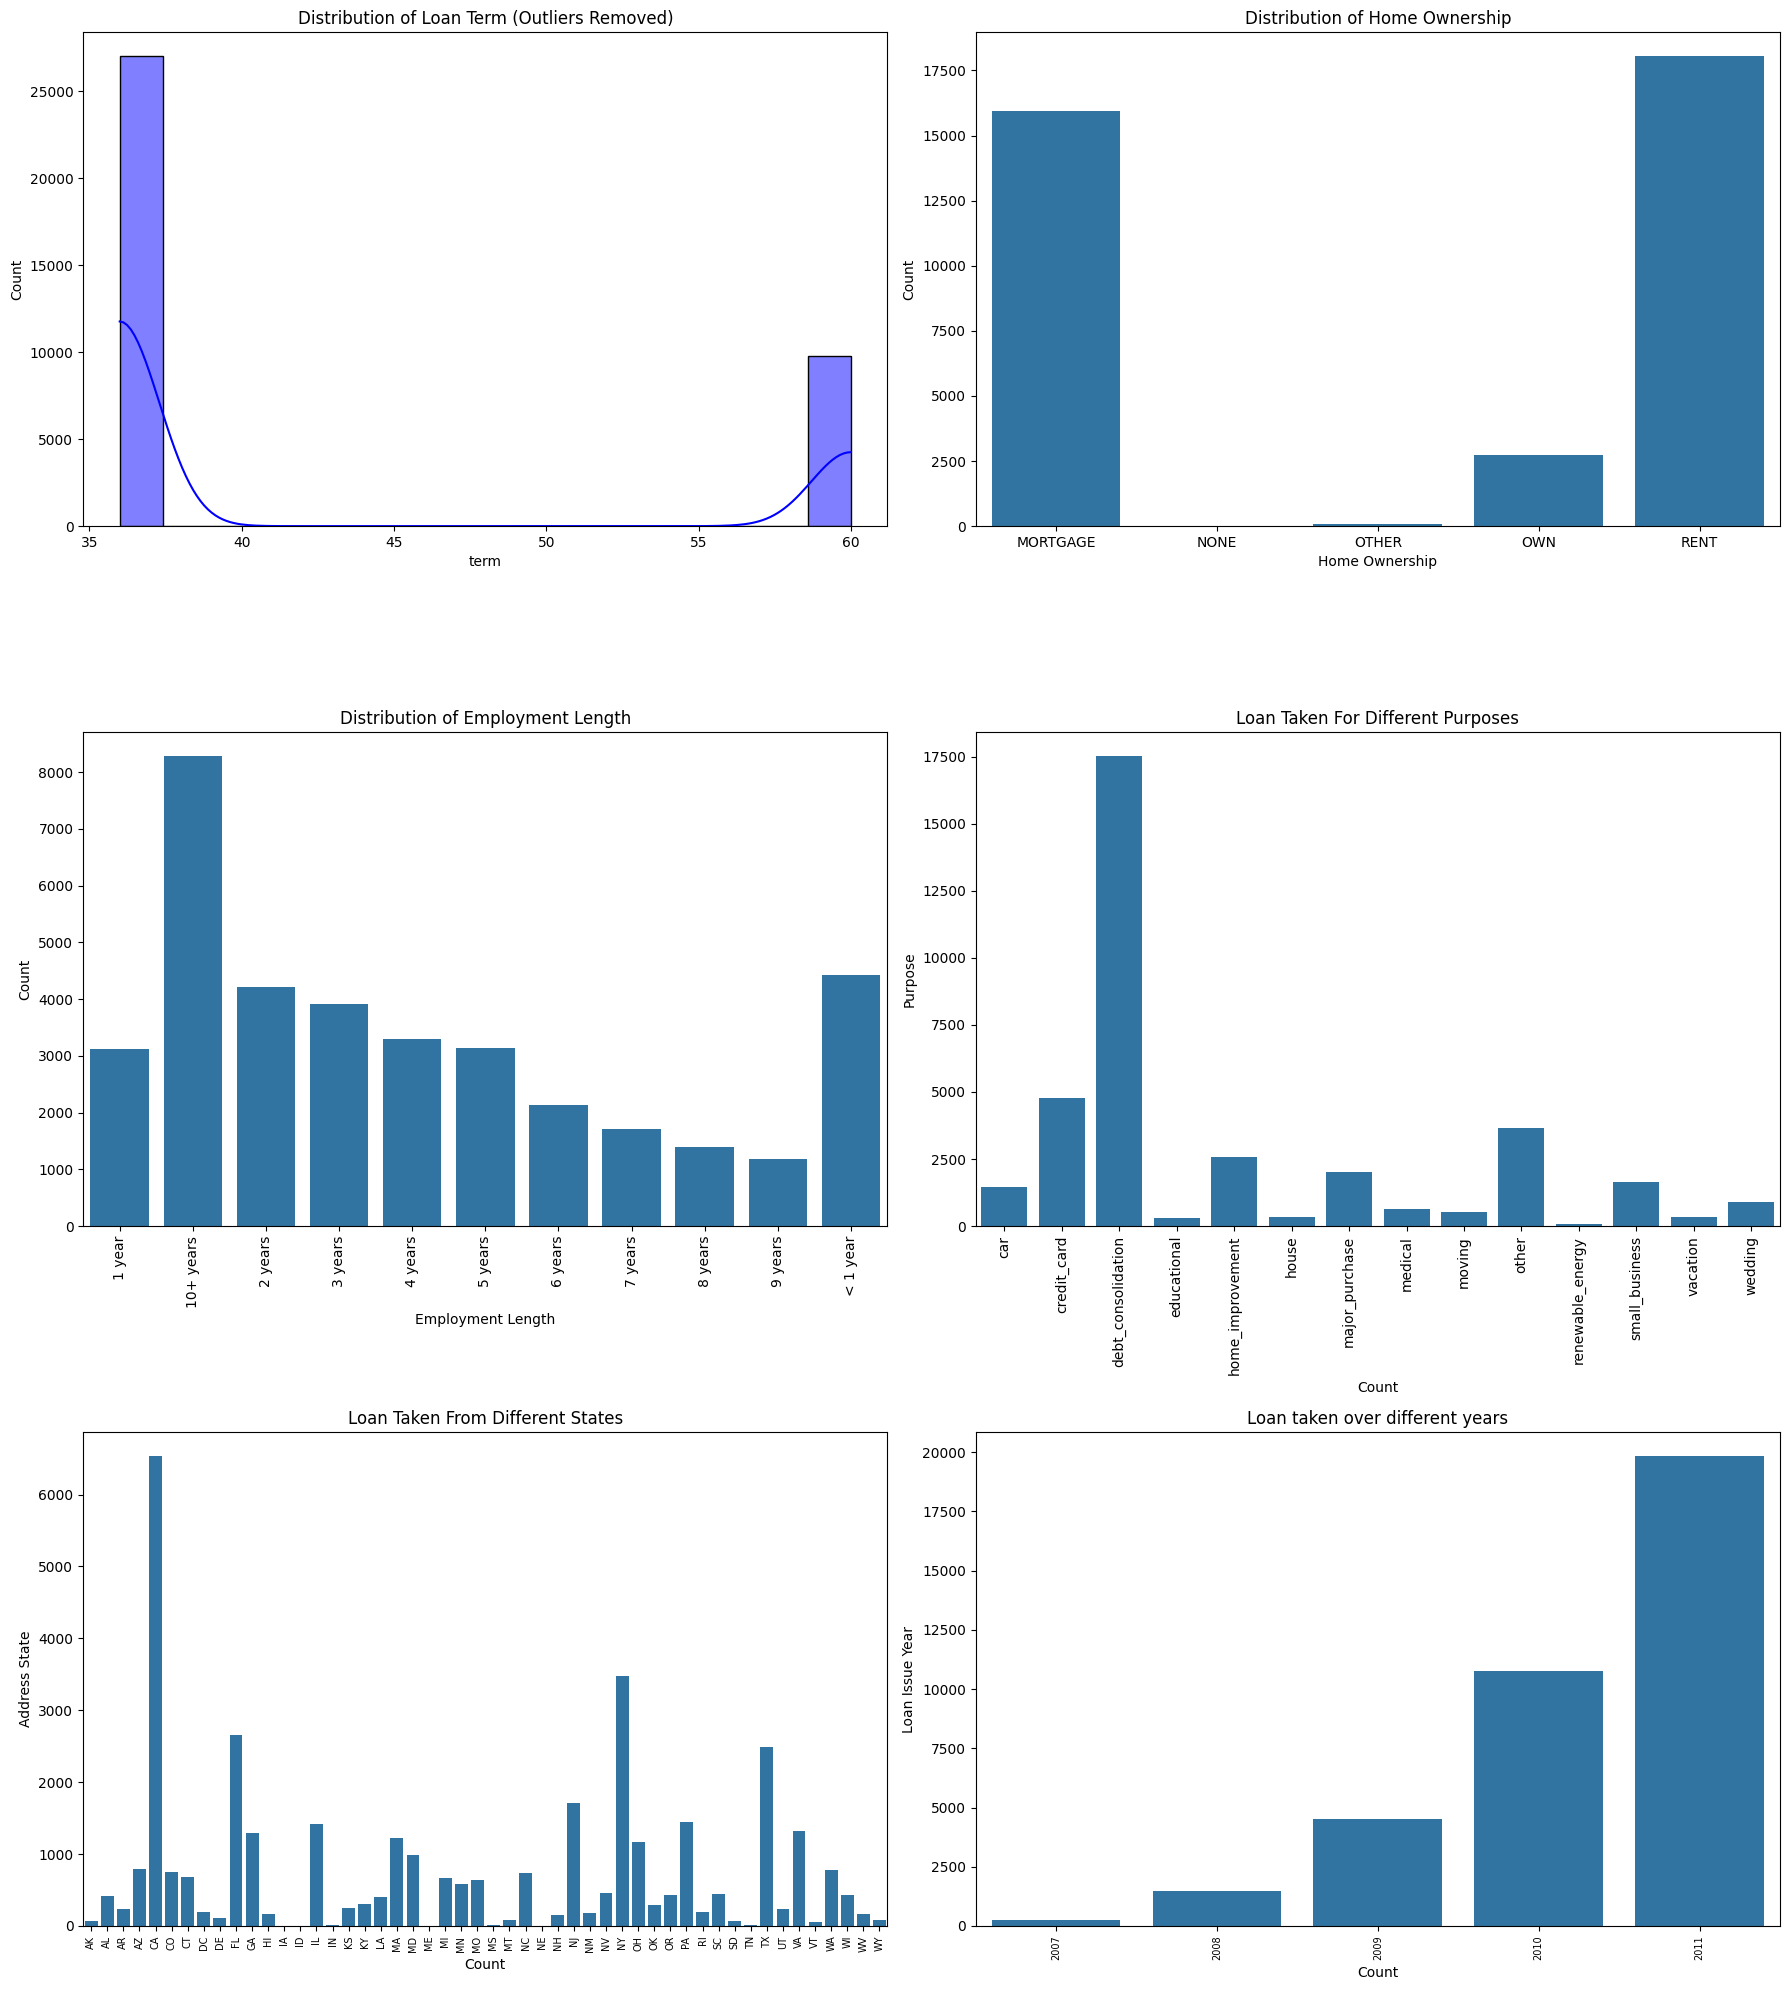

In [45]:
plt.figure(figsize=(18, 20))
#loan term, verification status, home ownership, Purpose, state wise distribution, pub record bankruptcy, distribution by year
#employment lengh

#loan distribution by month

# Plot 1: Distribution By Loan Term
plt.subplot(3, 2, 1)
sns.histplot(df_loan_withoutOutlier['term'], kde=True, color='blue')
plt.title('Distribution of Loan Term (Outliers Removed)')

# Distribution By Home Ownership
plt.subplot(3, 2, 2)
sns.countplot(x=df_loan_withoutOutlier.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)


# Distribution By Employment Length
plt.subplot(3, 2, 3)
sns.countplot(x = df_loan_withoutOutlier.emp_length)
plt.xlabel('Employment Length')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)

# Distribution By Loan Purpose
plt.subplot(3, 2, 4)
sns.countplot(x = df_loan_withoutOutlier.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.xticks(rotation = 90)
plt.title('Loan Taken For Different Purposes',fontsize=12)

# Distribution By State of Applicant
plt.subplot(3, 2, 5)
sns.countplot(x = df_loan_withoutOutlier.addr_state)
plt.xlabel('Count')
plt.ylabel('Address State')
plt.xticks(rotation = 90, fontsize=7)
plt.title('Loan Taken From Different States',fontsize=12)

# Distribution By Loan Issue Year
plt.subplot(3, 2, 6)
sns.countplot(x = df_loan_withoutOutlier.issue_year)
plt.xlabel('Count')
plt.ylabel('Loan Issue Year')
plt.xticks(rotation = 90, fontsize=7)
plt.title('Loan taken over different years',fontsize=12)

plt.tight_layout()
plt.show()

__Observation From Univariate Analysis__

Loan Term: 36 months is the average loan duration; 60 month loans are less common.

Home Ownership:A lesser percentage of borrowers have mortgages, while the majority either rent or own their homes.

Verification Status (verification_status): Less loans are unverified, while loans with verified and source-confirmed statuses are split about evenly.

State-wise Distribution: Texas (TX), New York (NY), Florida (FL), and California (CA) have the biggest percentage of loans, although other states also have sizable percentages.

Loan Amount: The majority of loans range from USD 5000 to USD 15000.

Purpose: The most popular loan purpose is debt consolidation, which is followed by credit card refinancing.

Debt-to-income ratio: A greater ratio has a longer tail, with most DTI ratios falling below 20%.

Loan grades:The majority of loans fall into categories B and C, which denotes a moderate level of credit risk.

Loan Status: Fewer loans are in default. Most are fully paid off or charged off.

Interest Rate: Interest rates have a peak of approximately 10 to 15 percent and a range of approximately 5percent to 25 percent.

Annual Income: While some outliers have substantially greater salaries, the majority of borrowers make less than $100,000 annually.

#### (||) Segmented Univariate Analysis

In this analysis we will see how the other variables vary when segmented by Loan Status

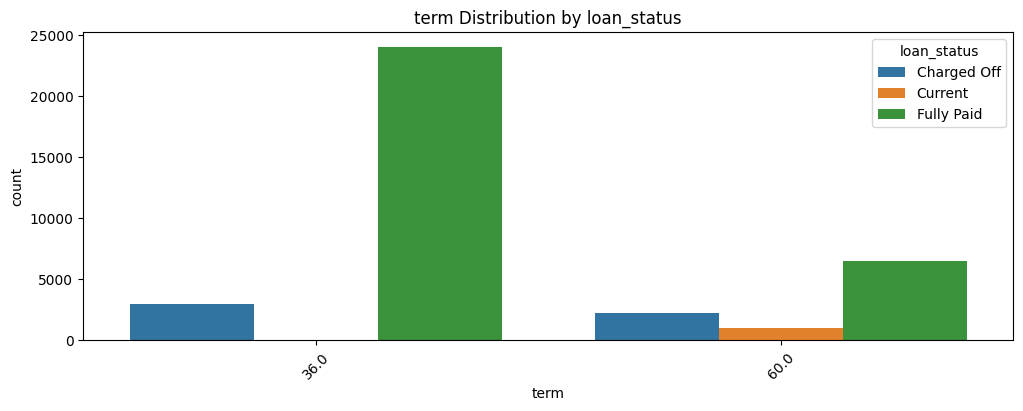

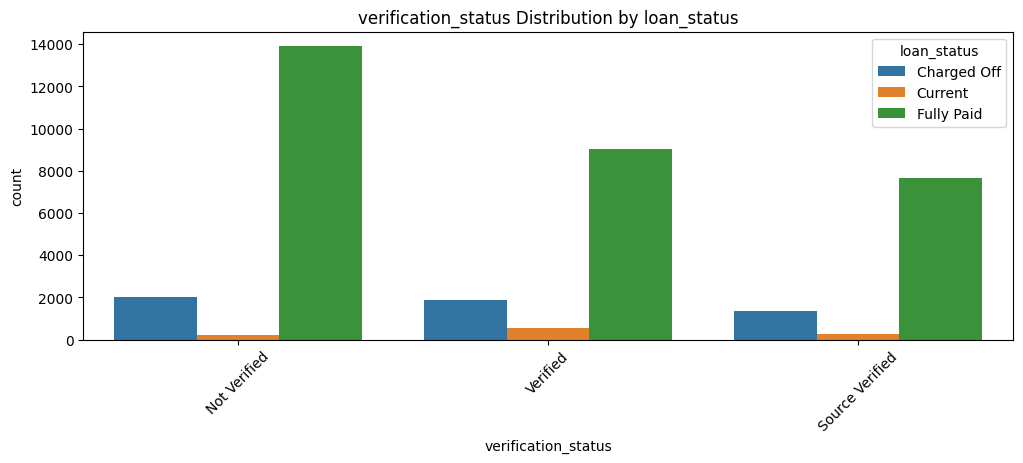

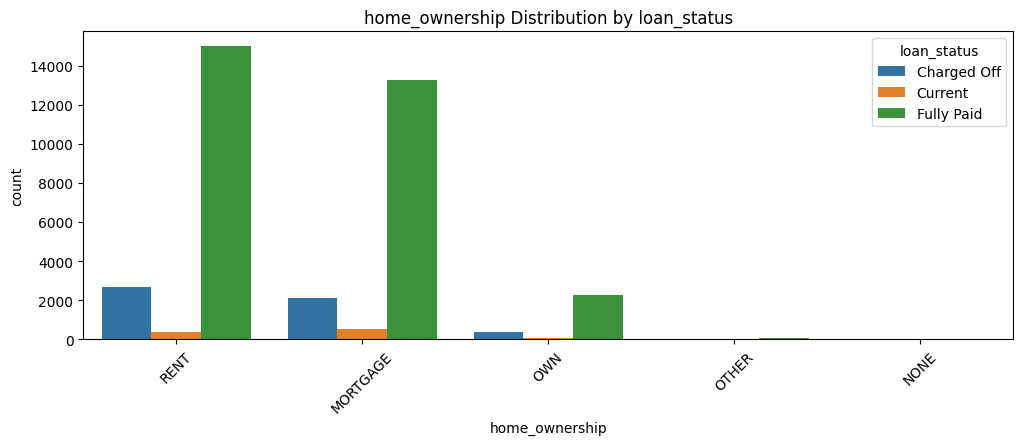

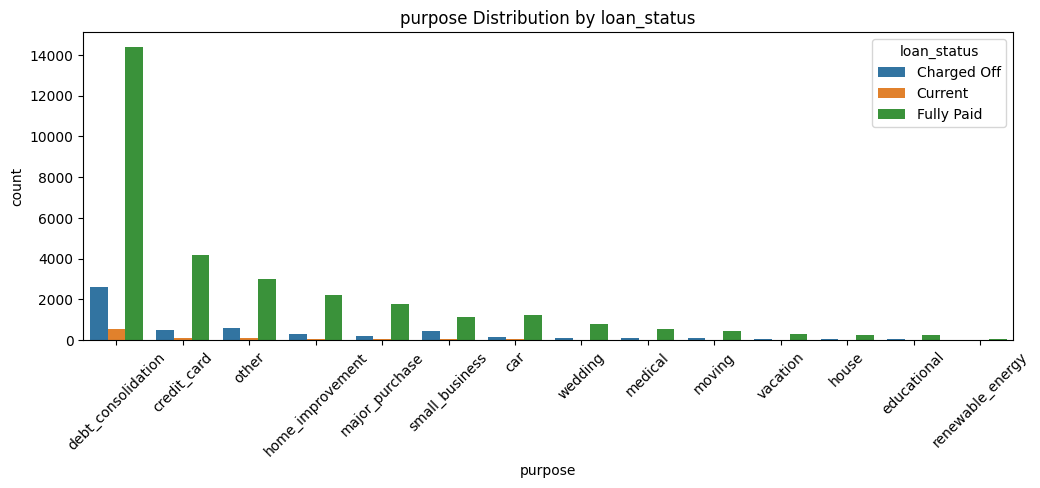

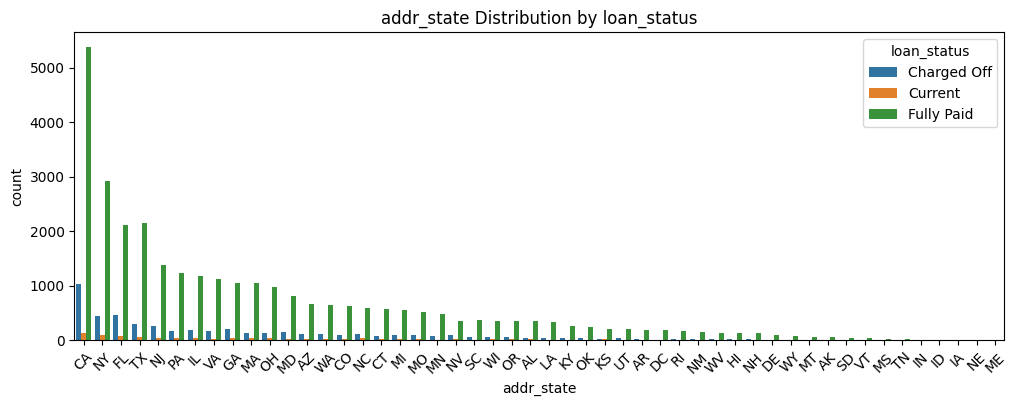

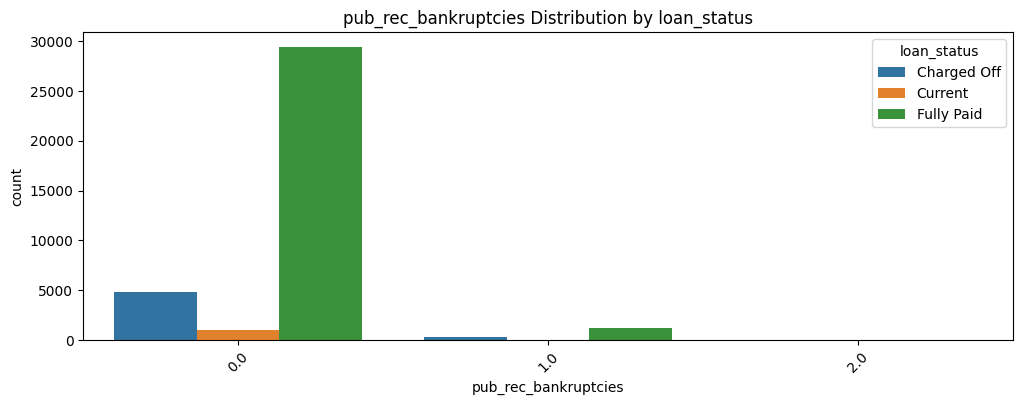

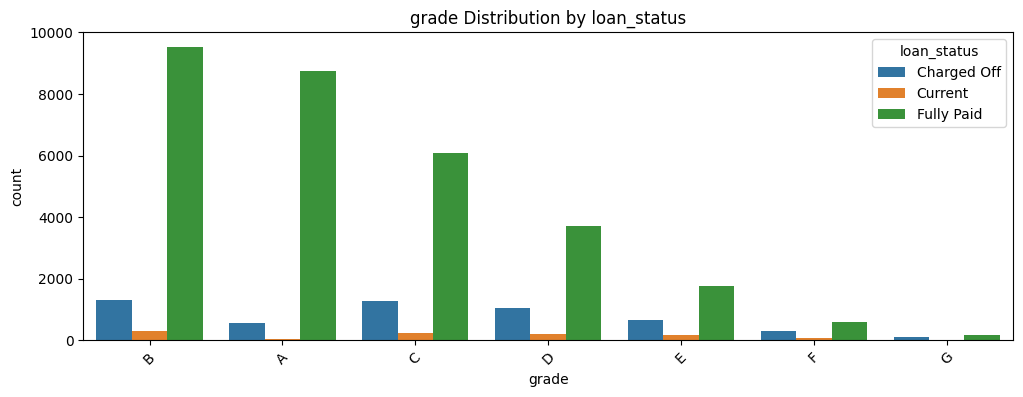

In [55]:
# Creating 2 separate sets of variable: Categorical and Numerical, for Segmented Univariate Analysis
categorical_vars = ['term', 'verification_status', 'home_ownership', 'purpose', 'addr_state', 'pub_rec_bankruptcies', 'grade', 'loan_status']
numerical_vars = ['loan_amnt', 'int_rate', 'dti', 'annual_inc']

# Define a function for segmented univariate analysis
def plot_segmented_univariate(data, x_col, hue_col):
    plt.figure(figsize=(12, 4))
    sns.countplot(data=data, x=x_col, hue=hue_col, order=data[x_col].value_counts().index)
    plt.title(f'{x_col} Distribution by {hue_col}')
    plt.xticks(rotation=45)
    plt.show()

# Conduct segmented univariate analysis on categorical variables segmented by 'loan_status'
for col in categorical_vars:
    if col != 'loan_status':
        plot_segmented_univariate(df_loan_withoutOutlier, col, 'loan_status')

__Observation From Segmented Univariate Analysis when segmented by Loan Status__

Term vs. Loan Status: Compared to 60-month loans, which have a greater number of charged-off loans, 36-month loans have a higher proportion of fully paid loans.
Loan Status vs. Verification Status: Fully paid loans are slightly more common among loans that were source-verified, while fully paid loans are more common across all verification statuses.

Ownership of a Home vs. Loan Status: Compared to homeowners, renters and mortgage holders have a larger percentage of loans that are charged off.

Purpose vs. Loan Status: Compared to other purposes, debt consolidation loans have a greater percentage of charged-off loans. Small company loans and credit card refinancing also indicate a higher risk.

State vs. lending Status: While charged-off loans are common, they are concentrated in areas like California, Florida, and Texas that have substantial lending volumes.

Public Record Bankruptcies vs. Loan Status: Compared to loans without a bankruptcy history, loans with a history of bankruptcy have a higher chance of being charged off or defaulting.

Grade vs. Loan Status: Higher-grade loans (A, B) have more fully paid loans, whereas lower-grade loans (C, D, and E) have higher rates of being charged off.  


#### (|||) Bivariate Analysis

In this analysis we will see the relationship between 2 variables at a time. Here we have chosen the relevant variables as per the Business Domain knowledge

C:\Users\Anmaitre\AppData\Local\Temp\ipykernel_1080\438285395.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statewise_dist = df_loan_withoutOutlier.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().fillna(0)


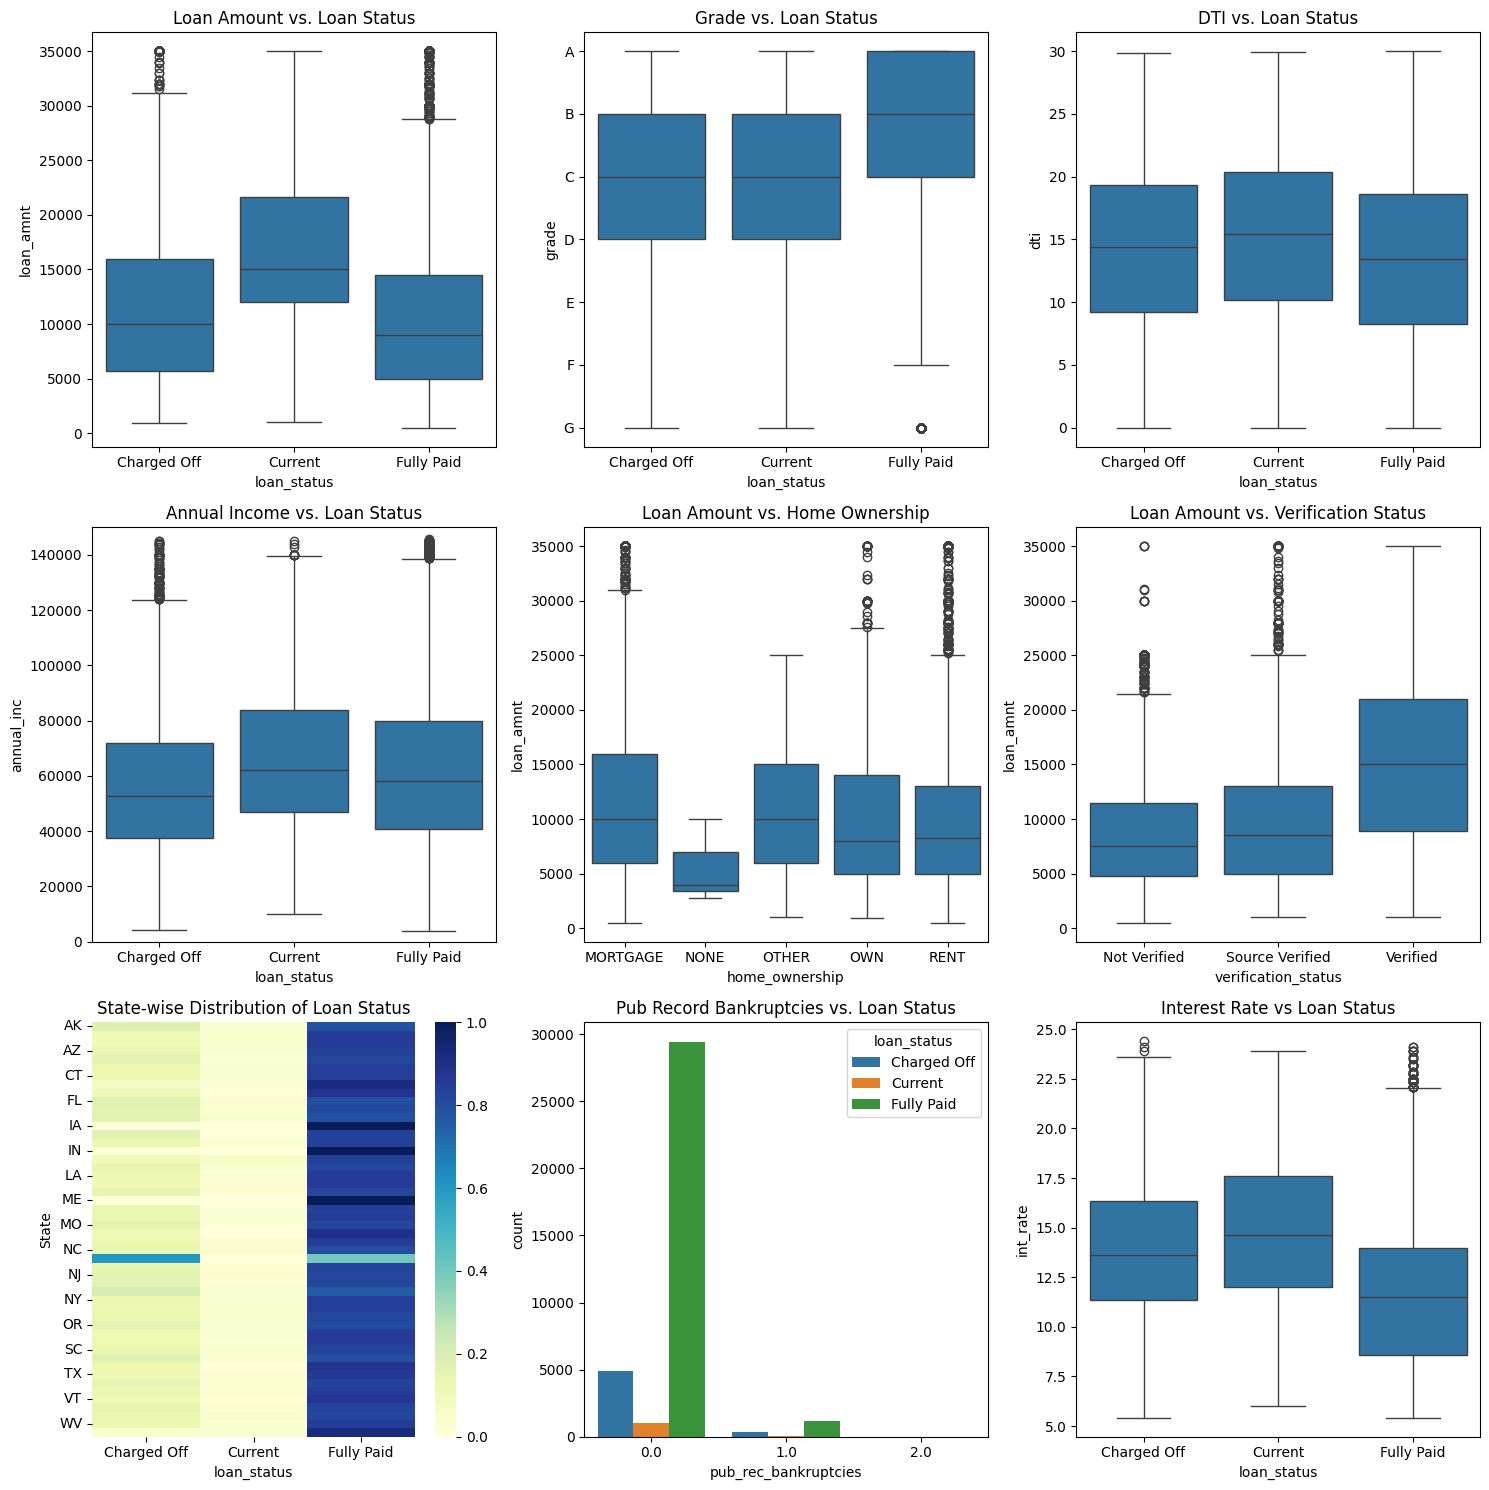

In [56]:
# Plotting relationships for bivariate analysis
plt.figure(figsize=(15, 15))

# 1. Loan amount vs. Loan status
plt.subplot(3, 3, 1)
sns.boxplot(x='loan_status', y='loan_amnt', data=df_loan_withoutOutlier)
plt.title('Loan Amount vs. Loan Status')

# 2. Grade vs Loan Status
plt.subplot(3, 3, 2)
sns.boxplot(x='loan_status', y='grade', data=df_loan_withoutOutlier)
plt.title('Grade vs. Loan Status')

# 3. DTI vs. Loan Status
plt.subplot(3, 3, 3)
sns.boxplot(x='loan_status', y='dti', data=df_loan_withoutOutlier)
plt.title('DTI vs. Loan Status')

# 4. Annual Income vs. Loan Status
plt.subplot(3, 3, 4)
sns.boxplot(x='loan_status', y='annual_inc', data=df_loan_withoutOutlier)
plt.ylim(0, 150000)  # Limiting to reduce the effect of outliers
plt.title('Annual Income vs. Loan Status')

# 5. Loan Amount vs. Home Ownership
plt.subplot(3, 3, 5)
sns.boxplot(x='home_ownership', y='loan_amnt', data=df_loan_withoutOutlier)
plt.title('Loan Amount vs. Home Ownership')

# 6. Loan Amount vs. Verification Status
plt.subplot(3, 3, 6)
sns.boxplot(x='verification_status', y='loan_amnt', data=df_loan_withoutOutlier)
plt.title('Loan Amount vs. Verification Status')

# 7. State-wise Distribution of Loan Status
plt.subplot(3, 3, 7)
statewise_dist = df_loan_withoutOutlier.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
sns.heatmap(statewise_dist, cmap='YlGnBu')
plt.title('State-wise Distribution of Loan Status')
plt.ylabel('State')

# 8. Pub Record Bankruptcies vs. Loan Status
plt.subplot(3, 3, 8)
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=df_loan_withoutOutlier)
plt.title('Pub Record Bankruptcies vs. Loan Status')

# 9. Interest Rate vs Loan Status 
plt.subplot(3, 3, 9)
sns.boxplot(x='loan_status', y='int_rate', data=df_loan_withoutOutlier)
plt.title('Interest Rate vs Loan Status')

plt.tight_layout()
plt.show()

__Main Observation From Bivariate Analysis__

Compared to homeowners, renters and mortgage holders have a larger percentage of loans that are charged off.

Charged off loans are minimum in case of income source verified. Fully paid loans are common in all segments.

Loans with 36 months term are more paid off compared to 60 months term.

Higher-grade loans (A, B) have more fully paid loans, whereas lower-grade loans (C, D, and E) have higher rates of being charged off.

Loans with no bankruptcy have considerably higher chance of being paid fully.

Debt consolidation, charged-off loans, small company loans and credit card refinancing also indicate a higher risk.